# Lab Work 1

### Exercice 1

1. Generate $(U_1,\ldots,U_n)$ iid copies of $U\sim\mathcal{U}(0,1)$ for $n=500$.

2. Compute $\mathbb{E}[U]$ and draw the dynamic of $$k\in\{1,2,\cdots,n\}\mapsto\bar{U}_k:=\frac{1}{k}\sum_{i=1}^k {U_i}.$$ What do you observe? 

3. Rerun the code of Questions 1 and 2. What do you observe? 

4. Draw also the dynamics of $$k\in\{1,2,\cdots,n\}\mapsto\bar{U}_k \pm 1.96 \frac{\bar{\sigma}_k}{\sqrt{k}}\qquad \text{with  }\bar{\sigma}^2_k:=\frac{1}{k}\sum_{i=1}^k {\left(U_i-\bar{U}_k\right)^2}=\frac{1}{k}\sum_{i=1}^k {U_i^2} - \bar{U}_k^2.$$ What do you observe?

5. Generate a large sample of iid copies of $$\frac{\sqrt{n}}{\bar{\sigma}_n}\left(\bar{U}_n-\frac{1}{2}\right).$$ Draw the corresponding empirical distribution using an histogram and compare it to the probability density function of $\mathcal{N}(0,1)$.

6. Let $Y=-\text{log}(U).$ Compute $\mathbb{E}[Y]$ and provide a MC estimator of this quantity.

### Solution

1. We can use the random number generator $\texttt{random.rand}$ from the $\texttt{numpy}$ library to generate $n$ random numbers $U=(U_k)_{k=1,..,n}$

In [4]:
import numpy as np #library for numerics including random number generator

n=500
U=np.random.rand(n)

print("\nRandom Numbers:",U[:10])


Random Numbers: [0.71645857 0.67450962 0.05061497 0.28670346 0.34275293 0.93059625
 0.03780831 0.54175274 0.65838515 0.24520281]


2. First we compute $X=(\bar{U}_k)_{k=1,..,n}$ from $U=(U_k)_{k=1,..,n}.$ The function $\texttt{np.cumsum}$ calculate the cumulative sum of a vector and the vector $\text{range}(1,n+1)$ corresponds to $(1,..,n).$ 
Then we plot the graph of $k\mapsto \bar{X}_k$ together with $k\mapsto \mathbb{E}[U]=\frac{1}{2}$ using $\texttt{plot}$ from the $\texttt{matplotlib.pyplot}$ library

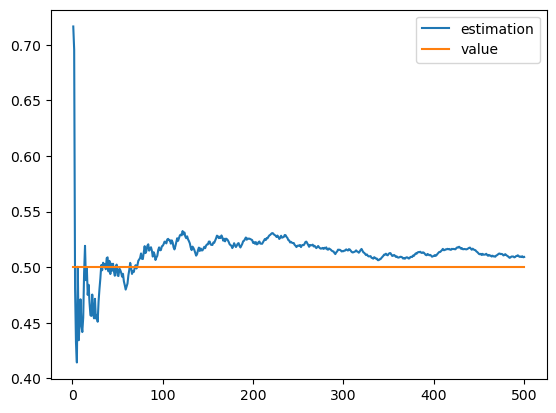

In [5]:
import matplotlib.pyplot as plt #library for plots

X=np.cumsum(U)/range(1,n+1)

plt.plot(range(1,n+1),X,label="estimation")
plt.plot([1,n],[0.5,0.5],label="value")
plt.legend()

3. After RERUNNING the code, we observe that we obtain different random numbers $U$ and so different estimators $\bar{U}.$ That is why we need to provide confidence intervals.

4. We calculate $V=(\bar{\sigma}_k^2)_{k=1,..,n}$ and we plot the different figures as above.

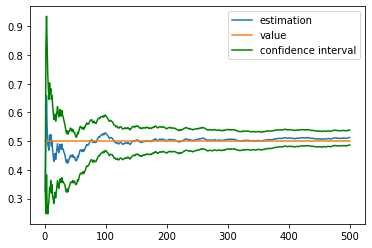

In [17]:
#V=(np.cumsum(U**2)-X**2)/range(1,n+1)
V=np.cumsum(U**2)/range(1,n+1)-X**2
E=1.96*np.sqrt(V)/np.sqrt(range(1,n+1)) 

plt.plot(range(1,n+1),X,label="estimation")
plt.plot([1,n],[0.5,0.5],label="value")
plt.plot(range(1,n+1),X+E,"green",label="confidence interval")
plt.plot(range(1,n+1),X-E,"green")
plt.legend()

5. We start by generating $m$ independent copies of $\frac{\sqrt{n}}{\bar{\sigma}_n}(\bar{X}_n-\frac{1}{2})$ and store them in $\texttt{EE}$. Note that $\texttt{np.mean}$ and $\texttt{np.std}$ compute the mean and the standart deviation of a vector respectively, the option $\texttt{axis=0}$ means that the computation occurs on the row vector.

In [18]:
n=500
m=10000

UU=np.random.rand(n,m)#matrix of random numbers of size (n,m)
EE=np.sqrt(n)/np.std(UU,axis=0)*(np.mean(UU,axis=0)-0.5)

Then we plot the histogram of the empirical distribution using $\texttt{plt.hist}$. 

(array([2.60024014e-04, 0.00000000e+00, 1.04009606e-03, 3.64033620e-03,
        1.27411767e-02, 3.25030018e-02, 7.04665079e-02, 1.38852824e-01,
        2.28301085e-01, 3.01627857e-01, 3.82755349e-01, 3.98876838e-01,
        3.59093164e-01, 2.79265791e-01, 1.84877074e-01, 1.06869870e-01,
        5.79853552e-02, 2.80825935e-02, 8.58079247e-03, 3.12028817e-03,
        1.04009606e-03, 2.60024014e-04]),
 array([-4.36929244, -3.98471258, -3.60013272, -3.21555285, -2.83097299,
        -2.44639313, -2.06181326, -1.6772334 , -1.29265353, -0.90807367,
        -0.52349381, -0.13891394,  0.24566592,  0.63024578,  1.01482565,
         1.39940551,  1.78398537,  2.16856524,  2.5531451 ,  2.93772497,
         3.32230483,  3.70688469,  4.09146456]),
 <a list of 22 Patch objects>)

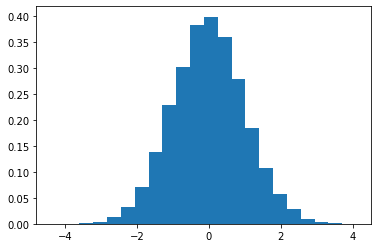

In [19]:
plt.hist(EE,bins=round(m**(1/3)),density=1,label="simulation")

Finally, we plot it together with the density of $\mathcal{N}(0,1).$

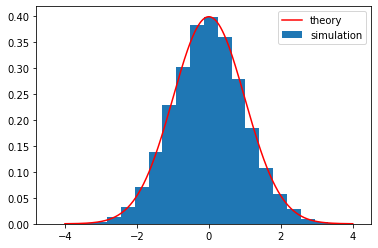

In [20]:
x=np.linspace(-4,4,1001)#x-coordinate for density of N(0,1)
y=np.exp(-x**2/2)/np.sqrt(2*np.pi)#=y-coordinate for density of N(0,1)

plt.hist(EE,bins=round(m**(1/3)),density=1,label="simulation")
plt.plot(x,y,"red",label="theory")
plt.legend(loc="best")

6. We proceed as follows and we can compare with the real value $\mathbb{E}[-\log(U)]=1.$

In [21]:
n=10000

U=np.random.rand(n)
Y=-np.log(U)

y=np.mean(Y) #estimator
s=np.std(Y,ddof=1) #standard deviation

print("Estimator:", y)
print("Condidence Interval 95%:", [y-1.96*s/np.sqrt(n),y+1.96*s/np.sqrt(n)])
print("Error:",100*1.96*s/(y*np.sqrt(n)),"%")

Estimator: 1.007141544462009
Condidence Interval 95%: [0.9873473313555429, 1.0269357575684754]
Error: 1.9653854232614183 %
